# Use isolate as a python module
This example shows the use of the ``isolate`` function by importing it directly to your python environment. 
`isolate` generates a mask for the cerebellum and brain stem for a T1w and/or T2w anatomical image. The mask is then used in the subsequent normalization step, but should also be used to prevent contamination of data from the abutting neocortex into the superior cerebellum (see below)

In [1]:
# Import necessary packages
from nilearn import plotting
import SUITPy as suit
import nibabel as nib

## Basic usage 
In the simplest case, `isolate` function takes just the T1-weight image as a parameter: 

In [2]:
# This function generates isolation mask for the cerebellum based on a T1 scan
ants_image = suit.isolate('sub-ex_T1w.nii.gz')

preprocessing
isolating cerebellum using UNet model
postprocessing
saving results into /Users/jdiedrichsen/Python/SUITPy/docs/source/notebooks


By default the results are saved in the same directory as the source image 

* `<basename>_cerebellum_desg.nii.gz`: Binary mask image for the cerebellum 
* `<basename>_trans.mat`: Affine transform 

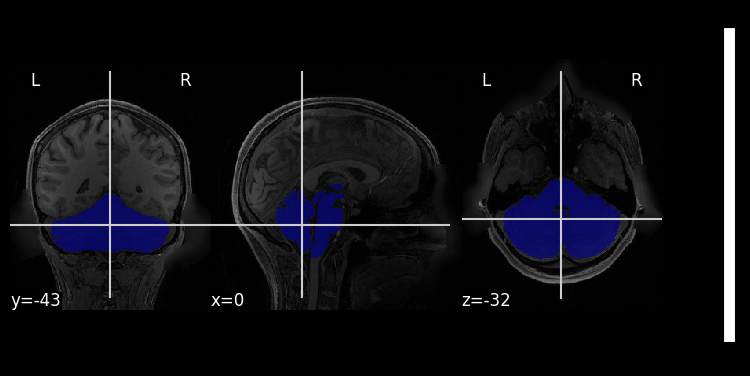

In [4]:
# Visualize the results:
img = nib.load('sub-ex_T1w.nii.gz')
mask = nib.load('sub-ex_T1w_cerebellum_dseg.nii.gz')
plotting.plot_roi(mask,img)

## Using T2 (and T1) image 
The isolation Unet is also trained on T2-weighted images 

In [4]:
suit.isolate(t2_file='sub-ex_T2w.nii.gz')

preprocessing
isolating cerebellum using UNet model
postprocessing
saving results into /Users/jdiedrichsen/Python/SUITPy/docs/source/notebooks


ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 320, 320)
	 Spacing    : (0.7, 0.7, 0.7)
	 Origin     : (-90.3, 124.6, -107.8)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

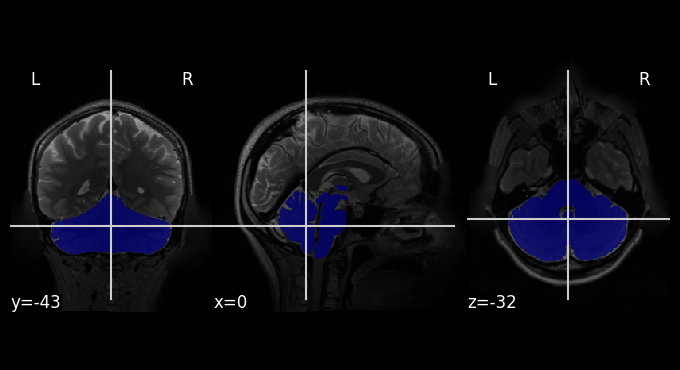

In [5]:
img = nib.load('sub-ex_T2w.nii.gz')
mask = nib.load('sub-ex_T2w_cerebellum_dseg.nii.gz')
plotting.plot_roi(mask,img)